# Easy

In [69]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 2.6 MB/s eta 0:00:002.7 MB/s eta 0:00:01


In [70]:
import numpy as np
import pandas as pd
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

In [21]:
data = pd.read_csv('CC GENERAL.csv')

In [22]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [40]:
data = data.dropna()
data = data.drop('CUST_ID', axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

In [25]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Убрали строчки с Nan-ми.

In [29]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

Отмасштабируем данные, т.к. большой разброс. Воспользуемся StandardScaler-ом. Также выдвину гипотизу: будем разбивать на 3 класса: бедные, средние, богатые.

In [79]:
model = Pipeline([('scaler', StandardScaler()),
                  ('KMeans', KMeans(n_clusters=3))])

In [80]:
model.fit(data)

Pipeline(steps=[('scaler', StandardScaler()), ('KMeans', KMeans(n_clusters=3))])

In [81]:
ans = model.predict(data)

In [82]:
ans

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

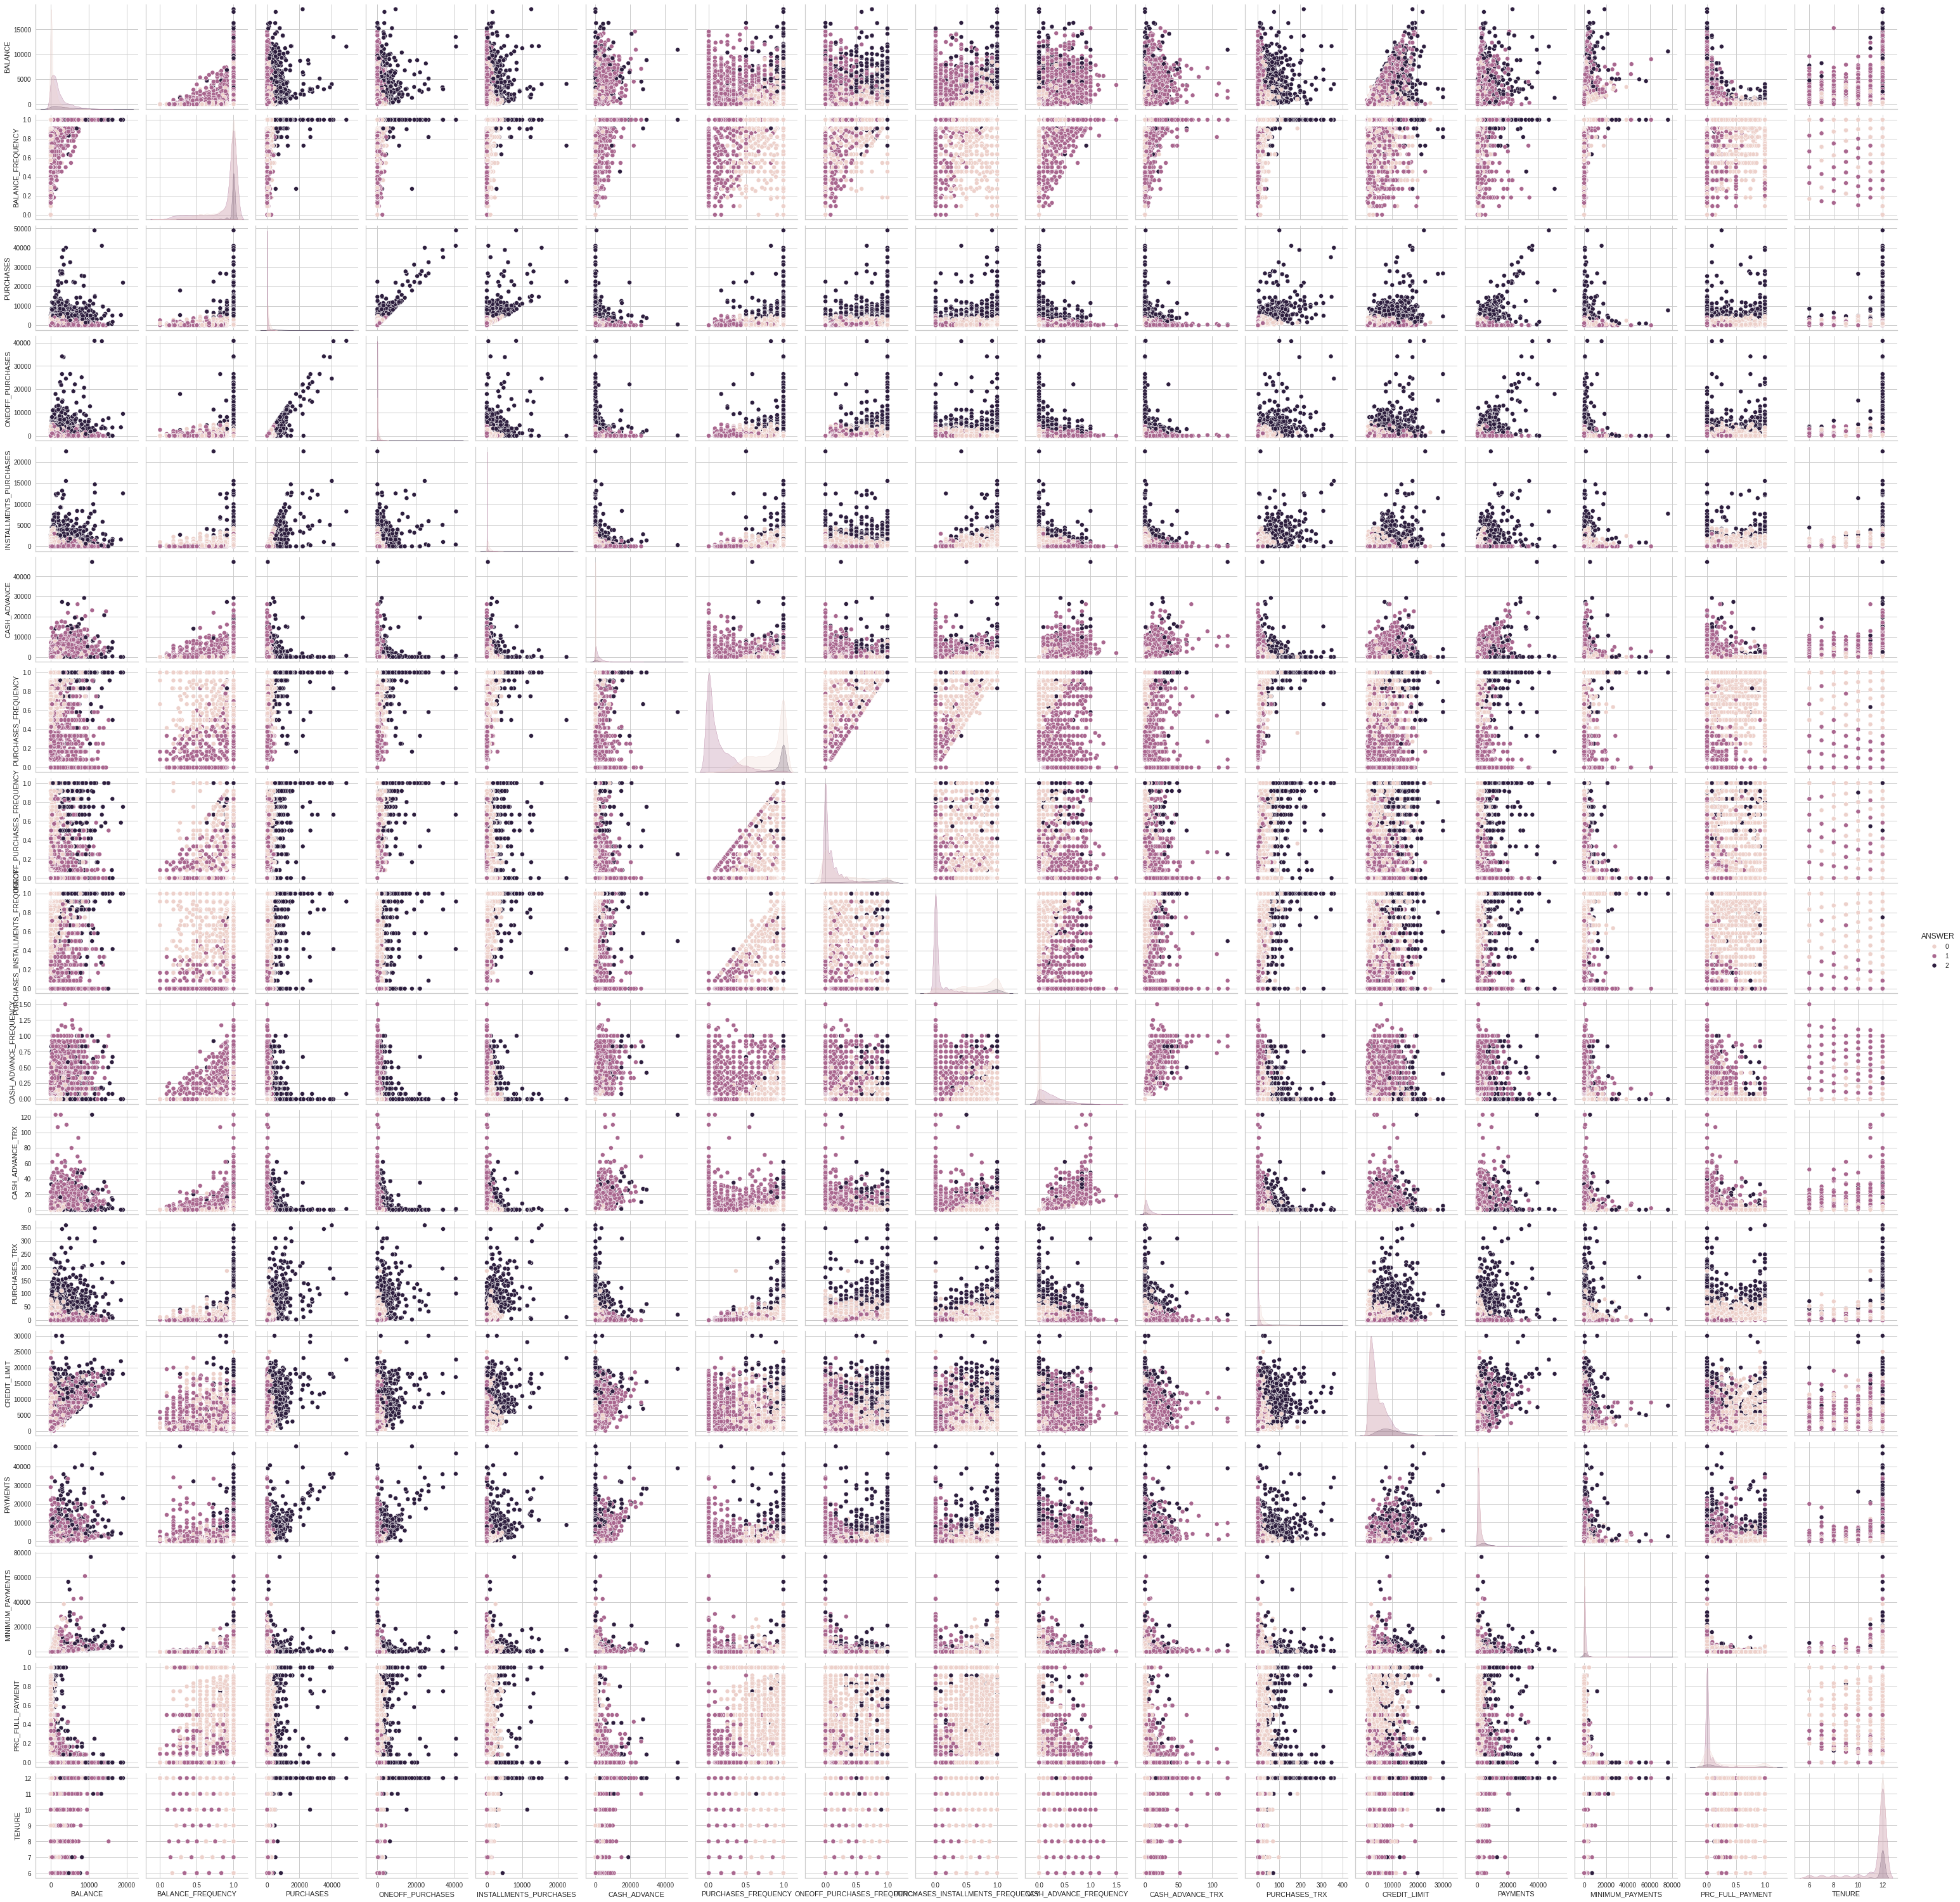

In [83]:
data['ANSWER']=ans
sns.pairplot(data, hue = 'ANSWER')

Видем, что всё таки зависит от состояния людей.

# NORMAL

In [97]:
model1 = KMeans()


In [102]:
model = Pipeline([('scaler', StandardScaler()),
                  ('visualizer', KElbowVisualizer(model1, k=(2,12)))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('visualizer',
                 KElbowVisualizer(ax=<AxesSubplot:>,
                                  estimator=KMeans(n_clusters=11),
                                  k=(2, 12)))])

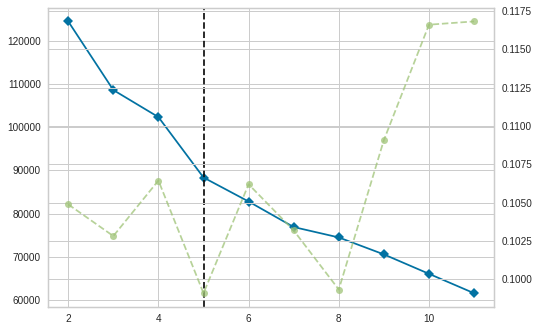

In [103]:
model.fit(data)

5 получилось оптимальным числом кластеров

In [151]:
agg = Pipeline([('scaler', StandardScaler()),
              ('agg', AgglomerativeClustering(5))])

In [152]:
pred = agg.fit_predict(data)

In [153]:
data['ANSWER'] = pred

In [168]:
print((data.groupby('RES')['BALANCE'].mean() * data.std().iloc[0] + data.mean().iloc[0]).tolist())
print((data.groupby('RES')['PURCHASES_FREQUENCY'].mean() * data.std().iloc[6] + data.mean().iloc[6]).tolist())
print((data.groupby('RES')['BALANCE_FREQUENCY'].mean() * data.std().iloc[1] + data.mean().iloc[1]).tolist())
print((data.groupby('RES')['ONEOFF_PURCHASES'].mean() * data.std().iloc[3] + data.mean().iloc[3]).tolist())
print((data.groupby('RES')['PAYMENTS'].mean() * data.std().iloc[13] + data.mean().iloc[13]).tolist())


[7736853.118100983, 2201810.1496658386, 8965550.581372643, 1656192.7452712648, 2056574.6307347897]
[0.8692582904930046, 0.5795683907656993, 0.6649439345886579, 0.8587333629293363, 0.6884733070640237]
[1.1001726719800753, 1.064723683929245, 1.0958723625000093, 1.0981062088617102, 1.0689092537078961]
[7982209.824097372, 306700.42971752264, 590888.7206962793, 1185237.7774407298, 442703.0043772758]
[18358549.716408644, 2895533.7449942953, 10537275.347911946, 4313921.200953616, 2000052.6683513739]


In [159]:
data = data.drop('ANSWER', axis=1)
km = Pipeline([('scaler', StandardScaler()),
              ('km', KMeans(n_clusters = 5))])

In [160]:
predk = km.fit_predict(data)

In [161]:
data['ANSWER'] = predk

In [169]:
print((data.groupby('RES')['BALANCE'].mean() * data.std().iloc[0] + data.mean().iloc[0]).tolist())
print((data.groupby('RES')['PURCHASES_FREQUENCY'].mean() * data.std().iloc[6] + data.mean().iloc[6]).tolist())
print((data.groupby('RES')['BALANCE_FREQUENCY'].mean() * data.std().iloc[1] + data.mean().iloc[1]).tolist())
print((data.groupby('RES')['ONEOFF_PURCHASES'].mean() * data.std().iloc[3] + data.mean().iloc[3]).tolist())
print((data.groupby('RES')['PAYMENTS'].mean() * data.std().iloc[13] + data.mean().iloc[13]).tolist())

[7736853.118100983, 2201810.1496658386, 8965550.581372643, 1656192.7452712648, 2056574.6307347897]
[0.8692582904930046, 0.5795683907656993, 0.6649439345886579, 0.8587333629293363, 0.6884733070640237]
[1.1001726719800753, 1.064723683929245, 1.0958723625000093, 1.0981062088617102, 1.0689092537078961]
[7982209.824097372, 306700.42971752264, 590888.7206962793, 1185237.7774407298, 442703.0043772758]
[18358549.716408644, 2895533.7449942953, 10537275.347911946, 4313921.200953616, 2000052.6683513739]


Результаты одинаковы